# Project 3: Regression

## Introducing the problem:
The question I want to answer is "what physiochemical properties of a wine make it a higher quality wine?" To do this I will be using Linear Regression to predict the quality of a wine given its properties.

## What is Linear Regression?
Linear regression is a statistical analysis model that is used model the relationship between a dependent variable and one or more independent variables. In our case the line it will be creating is linear equation of the form:
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon $$
This equation is specifically the multiple linear regression eqation where:
- $y$ is the dependent variable (the variable we are trying to predict),
- $\beta_0$ is the y-intercept (the constant term),
- $\beta_1$, $\beta_2$, $\dots$, $\beta_n$ are the coefficients of the independent variables  $x_1$, $x_2$, $\dots$, $x_n$,
- $\epsilon$ is the error term.

To find the coefficients of for the equation we want to minimize the sum of squared difference between predicted value $\hat y$ (y hat) and the actual y-value. This process, known as least squares matematically looks like $\sum(y_i - \hat y_i)^2$ where $y_i$ is the actal value and $\hat y_i$ is the predicted value.

## Introducing the Dataset:
Dataset: [https://archive.ics.uci.edu/dataset/186/wine+quality](https://archive.ics.uci.edu/dataset/186/wine+quality)
I found this dataset on the UCI Machine Learning Repository. It has 11 feature variables that are used to predict the quality of the wine. The following are the feature variables:

- fixed acidity
- volatic aidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

### Install the following library to access the dataset

In [1]:
!pip install ucimlrepo

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#from sklearn
# For loading the data
from ucimlrepo import fetch_ucirepo

## Loading the Dataset

In [5]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets
df = pd.concat([X,y], axis=1)

In [6]:
df.shape

(6497, 12)

In [7]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Preprocessing

In [8]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Visualization

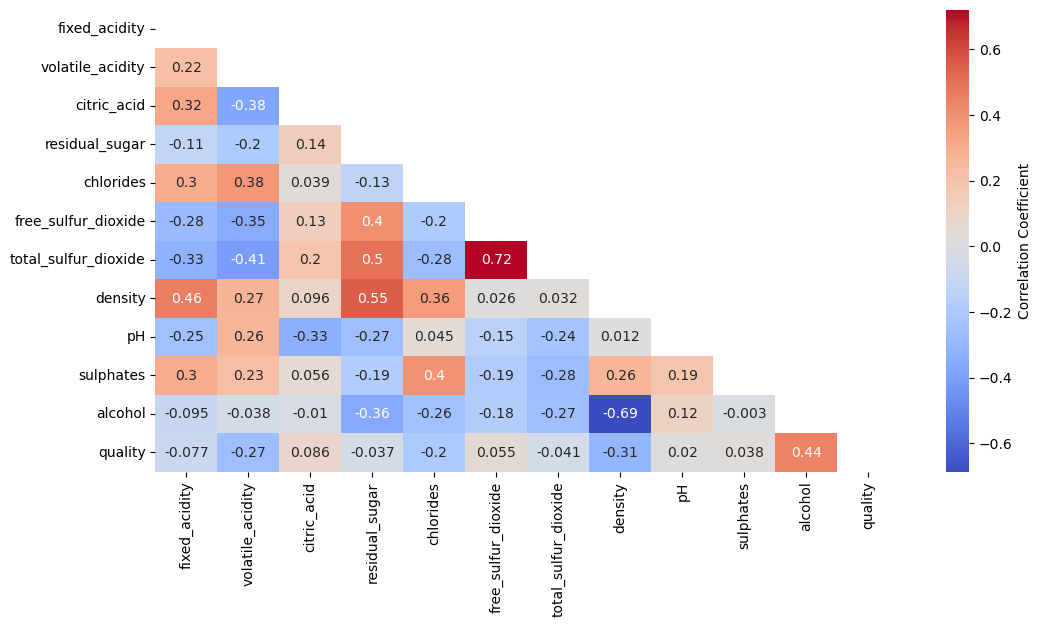

In [17]:
plt.figure(figsize=(12, 6))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.show()

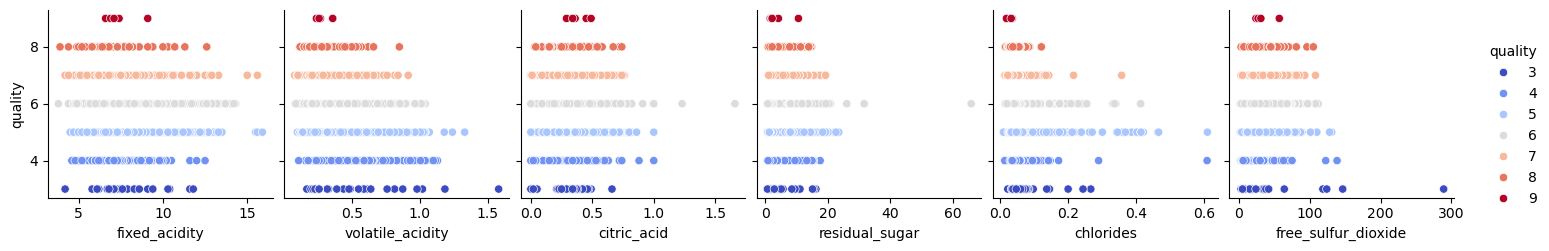

In [22]:
sns.pairplot(data=df, x_vars=df.columns[0:6], y_vars=['quality'], hue='quality', palette='coolwarm')
plt.show()

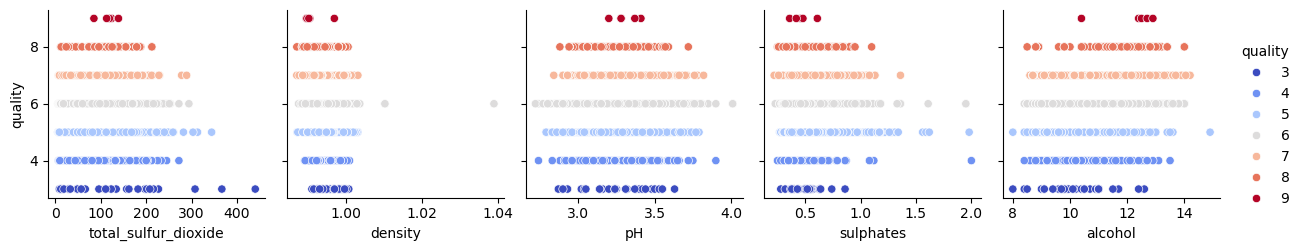

In [23]:
sns.pairplot(data=df, x_vars=df.columns[6:11], y_vars=['quality'], hue='quality', palette='coolwarm')
plt.show()